In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('states_all.csv') 
data.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN


In [3]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           694
TOTAL_REVENUE                    643
FEDERAL_REVENUE                  643
STATE_REVENUE                    643
LOCAL_REVENUE                    643
TOTAL_EXPENDITURE                643
INSTRUCTION_EXPENDITURE          643
SUPPORT_SERVICES_EXPENDITURE     643
OTHER_EXPENDITURE                694
CAPITAL_OUTLAY_EXPENDITURE       643
GRADES_PK_G                      376
GRADES_KG_G                      286
GRADES_4_G                       286
GRADES_8_G                       286
GRADES_12_G                      286
GRADES_1_8_G                     898
GRADES_9_12_G                    847
GRADES_ALL_G                     286
AVG_MATH_4_SCORE                1383
AVG_MATH_8_SCORE                1387
AVG_READING_4_SCORE             1386
AVG_READING_8_SCORE             1421
dtype: int64

In [4]:

data2 = data.copy()

states = data2.STATE.unique()

columns = data2.columns[4:]

for column in columns:
    for state in states:
        data2[column].fillna(data2.groupby(by='STATE').mean()[column].loc[state], inplace=True)
    

In [7]:
data2.isnull().sum()


PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          694
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                       0
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                      0
GRADES_9_12_G                     0
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
dtype: int64

# Odev1

## Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

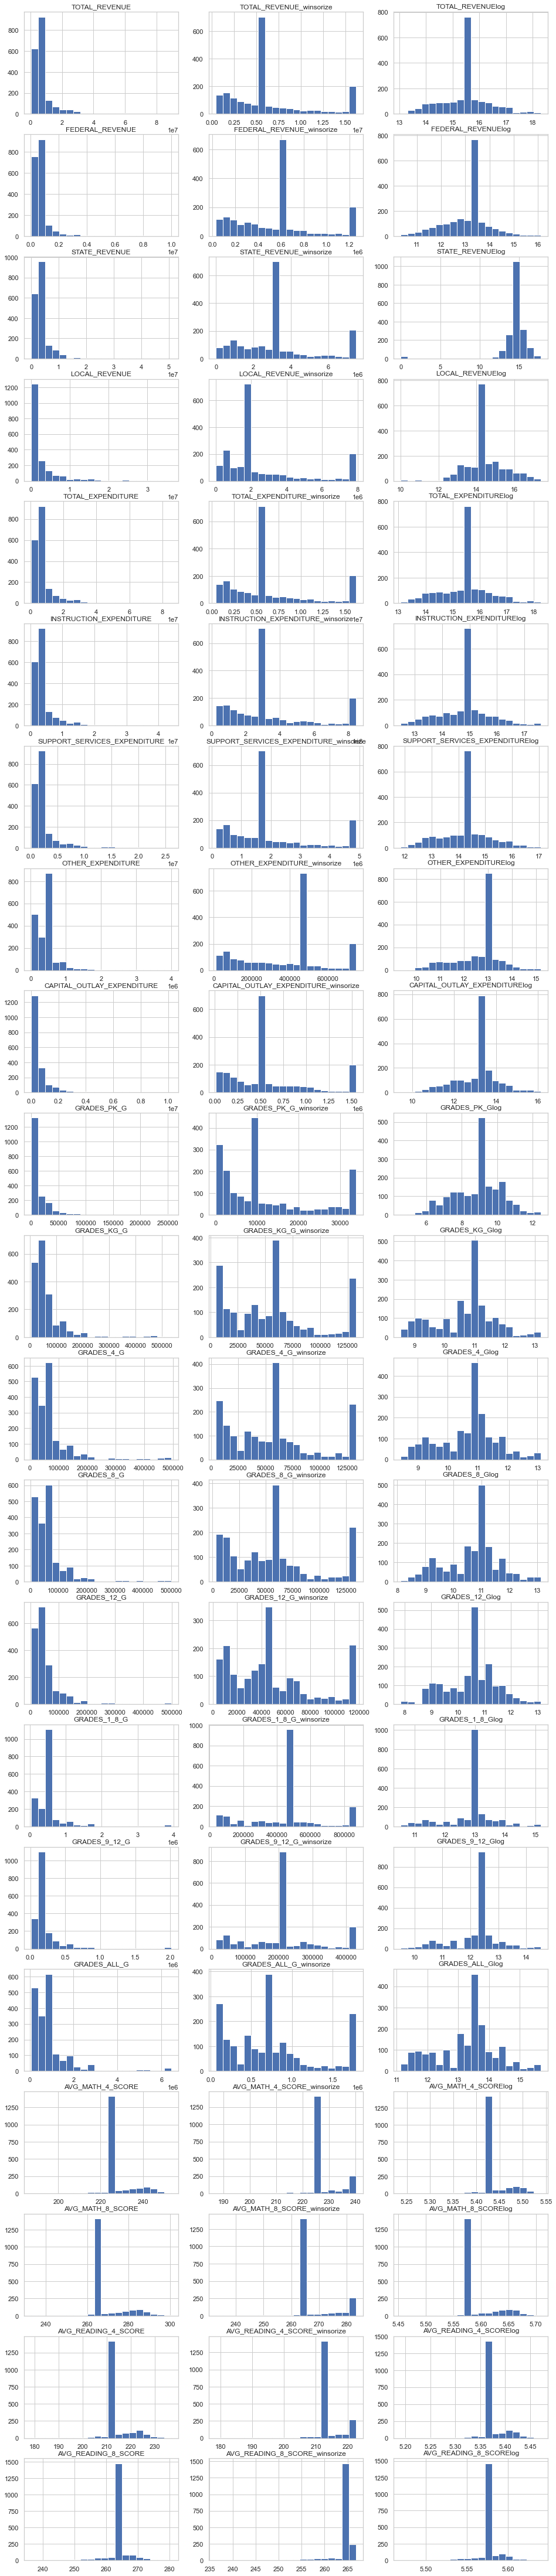

In [46]:
plt.figure(figsize=(16,80))


columns = data2.columns[4:]

for i,column in enumerate(columns):
    
    plt.subplot(21, 3, 3*i+1)
    plt.hist(data2[column], bins=20)
    plt.title(column)
   
    
    plt.subplot(21, 3, 3*i+2)
    plt.hist(winsorize(data2[column],(0, 0.10)), bins=20)
    plt.title(column+"_winsorize")
    
    plt.subplot(21, 3, 3*i+3)
    plt.hist(np.log(data2[column]+1), bins=20)
    plt.title(column+"log")
    


plt.show()

In [44]:
list(enumerate(columns))

[(0, 'TOTAL_REVENUE'),
 (1, 'FEDERAL_REVENUE'),
 (2, 'STATE_REVENUE'),
 (3, 'LOCAL_REVENUE'),
 (4, 'TOTAL_EXPENDITURE'),
 (5, 'INSTRUCTION_EXPENDITURE'),
 (6, 'SUPPORT_SERVICES_EXPENDITURE'),
 (7, 'OTHER_EXPENDITURE'),
 (8, 'CAPITAL_OUTLAY_EXPENDITURE'),
 (9, 'GRADES_PK_G'),
 (10, 'GRADES_KG_G'),
 (11, 'GRADES_4_G'),
 (12, 'GRADES_8_G'),
 (13, 'GRADES_12_G'),
 (14, 'GRADES_1_8_G'),
 (15, 'GRADES_9_12_G'),
 (16, 'GRADES_ALL_G'),
 (17, 'AVG_MATH_4_SCORE'),
 (18, 'AVG_MATH_8_SCORE'),
 (19, 'AVG_READING_4_SCORE'),
 (20, 'AVG_READING_8_SCORE')]

## ODEV 2
## Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

<Figure size 360x288 with 0 Axes>

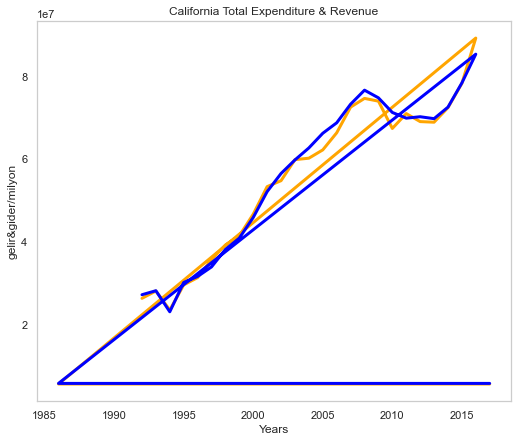

In [14]:
plt.figure(1, figsize = (5,4))

x = data2[data2.STATE == 'CALIFORNIA']["YEAR"]
y = data2[data2.STATE == 'CALIFORNIA']["TOTAL_REVENUE"]
y2 = data2[data2.STATE == 'CALIFORNIA']["TOTAL_EXPENDITURE"]

plt.figure(0, figsize = (8.5,7))
plt.plot(x,y, label = 'Total Revenue', color='orange', linewidth=3)
plt.plot(x,y2, label = 'Total Expenditure',color='blue', linewidth=3)
plt.xlabel('Years')
plt.ylabel('gelir&gider/milyon')
plt.title('California Total Expenditure & Revenue')
plt.grid()
plt.show()

<Figure size 360x288 with 0 Axes>

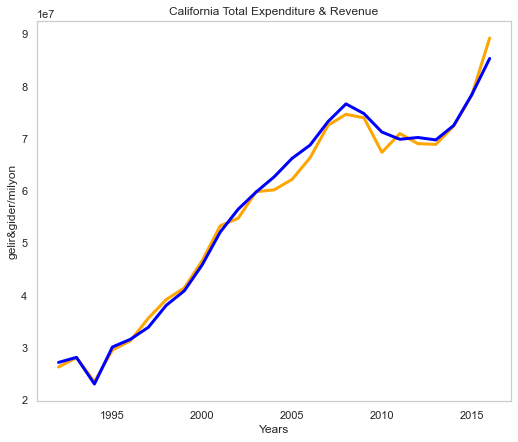

In [16]:
#datanın eyalet ortalması ile doldurulmamıs haline geri donelim


plt.figure(1, figsize = (5,4))

x = data[data.STATE == 'CALIFORNIA']["YEAR"]
y = data[data.STATE == 'CALIFORNIA']["TOTAL_REVENUE"]
y2 = data[data.STATE == 'CALIFORNIA']["TOTAL_EXPENDITURE"]

plt.figure(0, figsize = (8.5,7))
plt.plot(x,y, label = 'Total Revenue', color='orange', linewidth=3)
plt.plot(x,y2, label = 'Total Expenditure',color='blue', linewidth=3)
plt.xlabel('Years')
plt.ylabel('gelir&gider/milyon')
plt.title('California Total Expenditure & Revenue')
plt.grid()
plt.show()

# ODEV3
## Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?



In [26]:
data_cal = data[data['STATE'] == 'CALIFORNIA']
data_cal

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,NaN,NaN,5407475.0,NaN,NaN,NaN,NaN
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,NaN,NaN,5536406.0,NaN,NaN,NaN,NaN
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,NaN,NaN,5686198.0,209.129083,262.772478,201.912591,269.197451
259,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,...,451069.0,412604.0,317595.0,3591033.0,1578929.0,5803887.0,NaN,NaN,NaN,NaN
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,NaN,NaN
361,1999_CALIFORNIA,CALIFORNIA,1999,5839207.0,41393435.0,3599923.0,23695095.0,14098417.0,40834643.0,21110543.0,...,489356.0,431730.0,347914.0,3734997.0,1675778.0,6038590.0,NaN,NaN,NaN,NaN
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.565125,262.171027,205.916588,264.494066
463,2001_CALIFORNIA,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,...,485301.0,461133.0,365907.0,3871843.0,1745295.0,6247726.0,NaN,NaN,NaN,NaN


In [32]:
data_cal[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].head()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.398961,260.892247,196.764414,NaN
55,1993,NaN,NaN,NaN,NaN
106,1994,NaN,NaN,NaN,NaN
157,1995,NaN,NaN,NaN,NaN
208,1996,209.129083,262.772478,201.912591,269.197451


In [21]:
data_cal[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].mean()

AVG_MATH_4_SCORE       225.659625
AVG_MATH_8_SCORE       269.355244
AVG_READING_4_SCORE    207.911547
AVG_READING_8_SCORE    261.902652
dtype: float64

## ODEV4
## Matematik ve okuma notlarının dağılımı nedir?¶


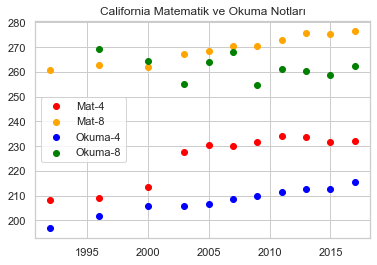

In [22]:
plt.scatter(data2['YEAR'].unique(), data_cal["AVG_MATH_4_SCORE"], color = "red")
plt.scatter(data2['YEAR'].unique(), data_cal["AVG_MATH_8_SCORE"], color = "orange")

plt.scatter(data2['YEAR'].unique(), data_cal["AVG_READING_4_SCORE"], color = "blue")
plt.scatter(data2['YEAR'].unique(), data_cal["AVG_READING_8_SCORE"], color = "green")

plt.title('California Matematik ve Okuma Notları')
plt.legend(["Mat-4", "Mat-8", "Okuma-4", "Okuma-8"])
plt.show()

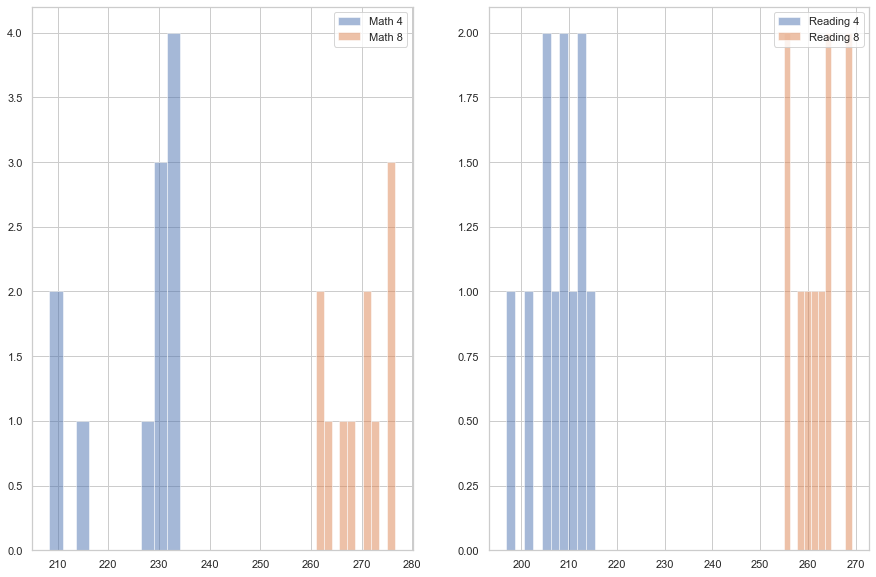

In [38]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
plt.hist(data_cal["AVG_MATH_4_SCORE"], alpha=0.5, label='Math 4') 
plt.hist(data_cal["AVG_MATH_8_SCORE"], alpha=0.5, label='Math 8') 
plt.legend(loc='upper right') 

plt.subplot(1,2,2)
plt.hist(data_cal["AVG_READING_4_SCORE"], alpha=0.5, label='Reading 4') 
plt.hist(data_cal["AVG_READING_8_SCORE"], alpha=0.5, label='Reading 8') 
plt.legend(loc='upper right') 

plt.show()

#8.sınıfların notlarının 4.sınıflarınkinden daha iyi oldugunu goruyoruz.
#8.sınıfların grafiği dalgalı bir trende sahip.

# ODEV 5
## Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.



In [48]:
dx = data_cal.copy()
dy = data_cal.copy()
dz = data_cal.copy()

dx.fillna(dx.mean(), inplace=True)
dy.fillna(dy.median(), inplace=True)
dz.fillna(dz.interpolate(limit_direction ='backward'), inplace=True)


print(dx.isnull().sum())
print(dy.isnull().sum())
print(dz.isnull().sum())

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64
PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
T

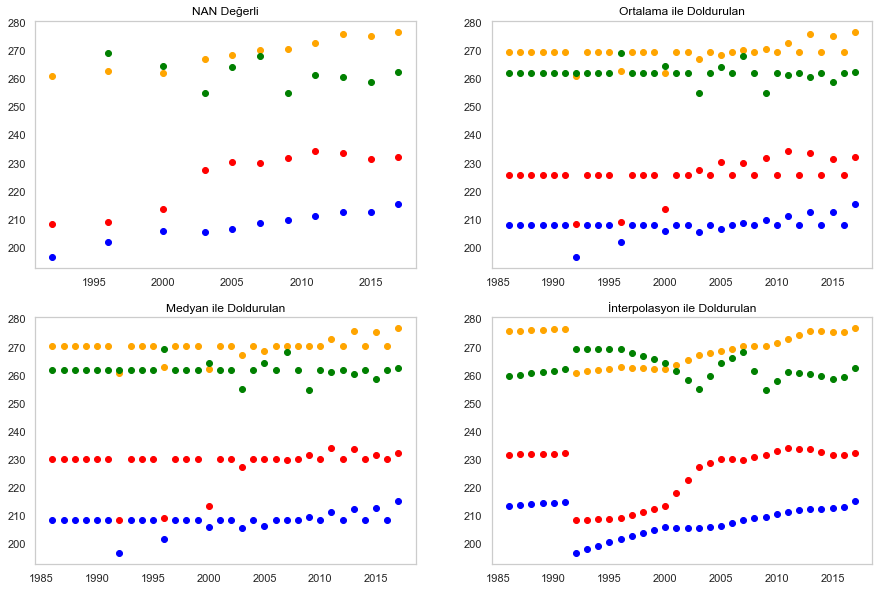

In [49]:
plt.figure(0, figsize = (15,10))

plt.subplot(2,2,1)
plt.scatter(data["YEAR"].unique(), data_cal["AVG_MATH_4_SCORE"], color="red")
plt.scatter(data["YEAR"].unique(), data_cal["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(data["YEAR"].unique(), data_cal["AVG_READING_4_SCORE"], color="blue")
plt.scatter(data["YEAR"].unique(), data_cal["AVG_READING_8_SCORE"], color="green")

plt.title("NAN Değerli", color="black")
plt.grid()


plt.subplot(2,2,2)
plt.scatter(data["YEAR"].unique(), dx["AVG_MATH_4_SCORE"], color="red")
plt.scatter(data["YEAR"].unique(), dx["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(data["YEAR"].unique(), dx["AVG_READING_4_SCORE"], color="blue")
plt.scatter(data["YEAR"].unique(), dx["AVG_READING_8_SCORE"], color="green")

plt.title("Ortalama ile Doldurulan", color="black")
plt.grid()

plt.subplot(2,2,3)
plt.scatter(data["YEAR"].unique(), dy["AVG_MATH_4_SCORE"], color="red")
plt.scatter(data["YEAR"].unique(), dy["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(data["YEAR"].unique(), dy["AVG_READING_4_SCORE"], color="blue")
plt.scatter(data["YEAR"].unique(), dy["AVG_READING_8_SCORE"], color="green")

plt.title("Medyan ile Doldurulan", color="black")
plt.grid()

plt.subplot(2,2,4)
plt.scatter(data["YEAR"].unique(), dz["AVG_MATH_4_SCORE"], color="red")
plt.scatter(data["YEAR"].unique(), dz["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(data["YEAR"].unique(), dz["AVG_READING_4_SCORE"], color="blue")
plt.scatter(data["YEAR"].unique(), dz["AVG_READING_8_SCORE"], color="green")

plt.title("İnterpolasyon ile Doldurulan", color="black")
plt.grid()

plt.show()

#ortalama ve medyan ile doldurma benzer grafikler sundu fakat interpolasyonda daha mantıklı bır sonuc beklıyordum zaman serısı oldugu ıcın 

